# Parsing the CSV file headers

    csv module parses the lines in a CSV file and enables quickly extract the values.

    examine the header to see what kinda info the file holds

In [1]:
# import modules
from pathlib import Path
import csv
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime

In [2]:
# read files into a list of lines objects by splitliens() method
path = Path('weather_data/sitka_weather_07-2021_simple.csv')
lines = path.read_text().splitlines()


In [3]:
# Use csv.reader() to build a reader obj that reads from the list of lines and parses file
reader = csv.reader(lines)
# return the next(1st) line from the beginning
header_row = next(reader)
print(header_row)

['STATION', 'NAME', 'DATE', 'TAVG', 'TMAX', 'TMIN']


The 'reader' object processes the first line of csv values in the file and stores each value as an item in a list.

    STATION: code for the weather station that recorded the data
    NAME: name of the weather station
    DATE: date of the data recorded
    TAVG: average temperature
    TMAX: maximum temperature
    TMIN: minimum temperature

And lets print this info out neatly in the following with enumerate(). The enumerate() function returns both the index of each item and the value of each item as you loop through a list. As we can see, dates are in column with index 2, high temperatures are in column with index 4.

In [4]:
for index, column_header in enumerate(header_row):
    print(index, column_header)

0 STATION
1 NAME
2 DATE
3 TAVG
4 TMAX
5 TMIN


In [5]:
# Extract high temps
highs = [int(row[4]) for row in reader]

NOTE: We have already used next() to read the header, the list comprehension will start from the 2nd row.

# Plotting Data in a Temperature Chart
    Create a pilot plot on daily highs

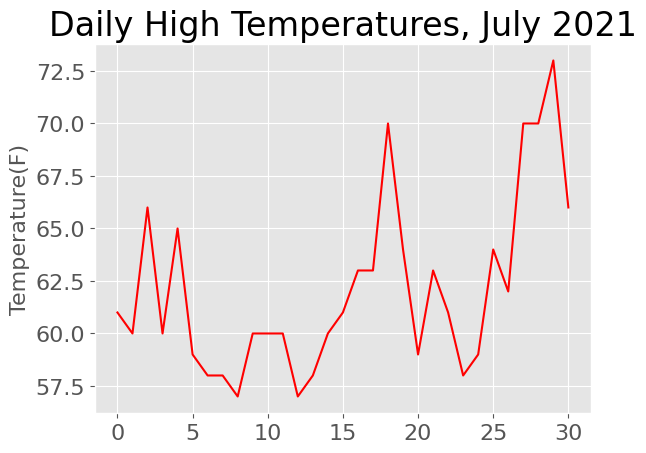

In [6]:
# Plot the high temperatures
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.plot(highs, color='red')
# Format plot
ax.set_title("Daily High Temperatures, July 2021", fontsize=24)
ax.set_xlabel('', fontsize=16)
ax.set_ylabel("Temperature(F)", fontsize=16)
ax.tick_params(labelsize=16)

plt.show()

# Add datatime to plots

Let's add dates to the above graph. Datetime will be read from CSV as strings, and we convert it to datetime format using strptime() method from the datetime module.

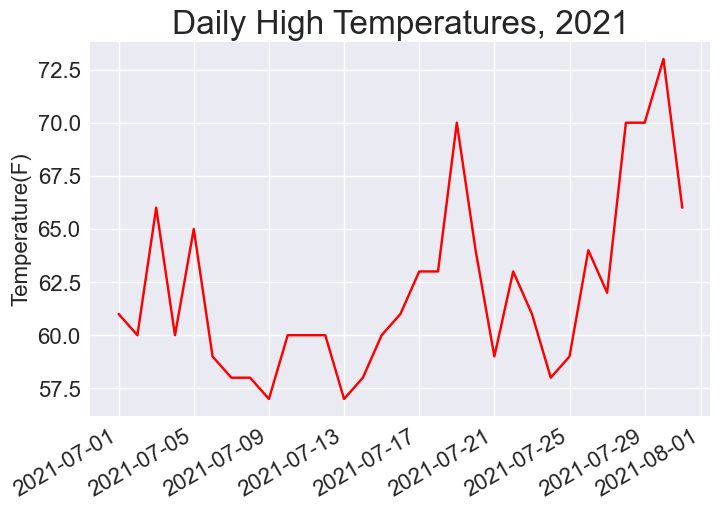

In [12]:
# Plotting a July's high temps
path = Path('weather_data/sitka_weather_07-2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)
# Extract dates and high temperatures
dates, highs = [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    high = int(row[4])
    dates.append(current_date)
    highs.append(high)
# Plot the high temperatures
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red')
# Format plot
ax.set_title("Daily High Temperatures, 2021", fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature(F)", fontsize=16)
ax.tick_params(labelsize=16)

plt.show()

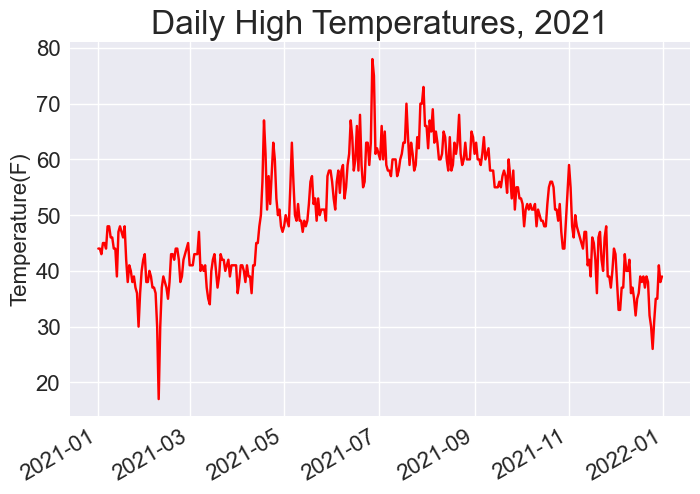

In [13]:
# Plotting a full year's high temps

path = Path('weather_data/sitka_weather_2021_simple.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)
# Extract dates and high temperatures
dates, highs = [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    high = int(row[4])
    dates.append(current_date)
    highs.append(high)
# Plot the high temperatures
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red')
# Format plot
ax.set_title("Daily High Temperatures, 2021", fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature(F)", fontsize=16)
ax.tick_params(labelsize=16)

plt.show()

# Add a second date series to overlay on the first plot

    We can see more info if we also plot low temps on the same graphs.

In [15]:
# Plotting a full year's high and low temps

path = Path('weather_data/sitka_weather_2021_simple.csv')
lines = path.read_text().splitlines()
reader = csv.reader(lines)
header_row = next(reader)

# Extract dates, high and low temperatures
dates, highs, lows = [], [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    high = int(row[4])
    low = int(row[5])
    dates.append(current_date)
    highs.append(high)
    lows.append(low)

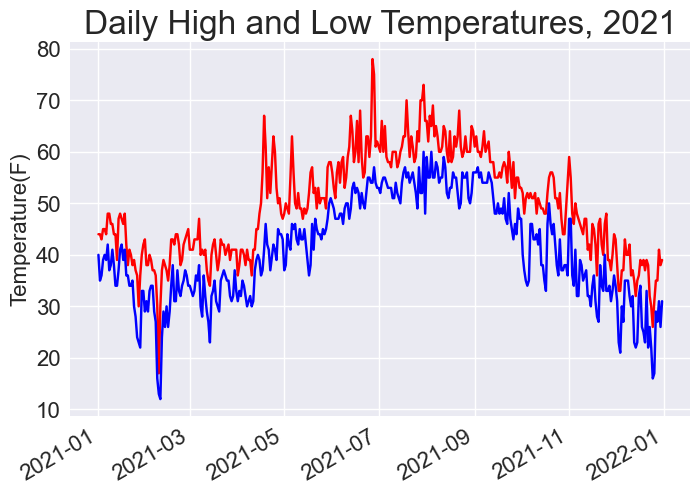

In [17]:
# Plot the high and low temperatures
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red')
ax.plot(dates, lows, color='blue')

# Format plot
ax.set_title("Daily High and Low Temperatures, 2021", fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature(F)", fontsize=16)
ax.tick_params(labelsize=16)

plt.show()

# Shading an area in the chart

    A finish touch we can add to the above chart is to highlight (shade) the range between the daily highs and lows.

    To do so, we use ax.fill_bewteen(x_values, y_values1, y_values2) method, which takes 1 series of x_values and 2 series of y_values and fills the sapce between the 2 series of y.

    The [alpha] argument controls the color transparency, with 0 being completely transparent, and 1 being fully opaque.

    The [facecolor] argument decides the color of the shade

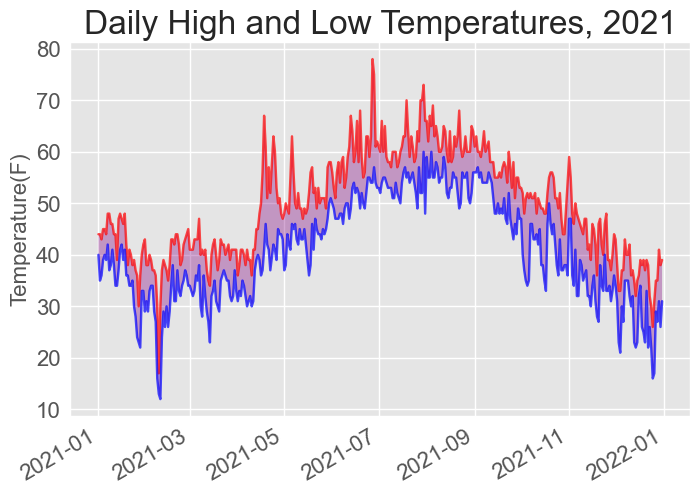

In [24]:
# Plot the high and low temperatures with shades filled in the range
plt.style.use('ggplot')
fig, ax = plt.subplots()
# Add the two axes
ax.plot(dates, highs, color='red', alpha=0.7)
ax.plot(dates, lows, color='blue', alpha=0.7)
# Fill the area in btw
ax.fill_between(dates, highs, lows, alpha=0.34, facecolor='purple')
# Format plot
ax.set_title("Daily High and Low Temperatures, 2021", fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature(F)", fontsize=16)
ax.tick_params(labelsize=16)

plt.show()

In [ ]:
# Error checking

## We need to anticipate possible malfunctions caused by missing data or compromised data.

## E.g. if we read in 'death_valley_2021_simple.csv', we will encounter ValueError: invalid literal for int() with base 10, which is a result of empty string, '' was passed into int() in the high temps column.

## Rather than looking thru all data, we will just handle cases of missing data directly. This error-checking can be done by adding a handel exceptions block upon the CSV.reader object being called part.

In [ ]:
# Plotting a full year's high and low temps for death valley, CA
path = Path('weather_data/death_valley_2021_simple.csv')
lines = path.read_text().splitlines()
reader = csv.reader(lines)
header_row = next(reader)

Thanks for the valuable share. My membership will expire Aug 31st, but I am still inclined to jump on it although it means essentially 11 months for me. Could you please elaborate by " I made P2 the primary using the same address, different phone number, and different email address", do you mean P2 used a new set of profiles compared to the one used last year as the household holder? If yes, I will gladly follow your steps and pull the trigger. Thanks in advance.